# Importing Libraries:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset:-

In [3]:
#Loading dataset:-

df=pd.read_csv('loan_prediction.csv')
df.columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant Income','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History','Property_Area','Loan_Status']


In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
#As we drop index Loan_ID column because it just kind of id which have no effect on dataset:

df.drop('Loan_ID',inplace=True,axis=1)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#Checking the total rows and total columns:

print(df.shape)

(613, 12)


# Exploratory Data Analysis(EDA):-

In [10]:
print("The shape of the dataset is:",df.shape)

The shape of the dataset is: (613, 12)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            610 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      581 non-null    object 
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   599 non-null    float64
 9   Credit History     563 non-null    float64
 10  Property_Area      613 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


# Description:-

In [12]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
count,600,610,598,613,581,613.000000,613.000000,592.000000,599.000000,563.000000,613,613
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,488,398,344,479,499,NaN,NaN,NaN,NaN,NaN,233,421
mean,NaN,NaN,NaN,NaN,NaN,5402.732463,1623.890571,146.412162,341.969950,0.841918,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6114.004114,2927.903583,85.587325,65.170672,0.365142,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2876.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.000000,1210.000000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5780.000000,2302.000000,168.000000,360.000000,1.000000,NaN,NaN


In [13]:
df.describe()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Applicant Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
df.corr()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
Applicant Income,1.000000,-0.116568,0.570909,-0.045340,-0.014764
CoapplicantIncome,-0.116568,1.000000,0.188619,-0.059643,-0.001581
Loan_Amount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045340,-0.059643,0.039447,1.000000,0.001258
Credit History,-0.014764,-0.001581,-0.008433,0.001258,1.000000


# Finding Null values:-

In [16]:
#checking null values in dataset:-

print(df.isna().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64


# Removing Null values:

In [17]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [18]:
df.Loan_Amount=df.Loan_Amount.fillna(df.Loan_Amount.mean())

In [19]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit History'].fillna(df['Credit History'].mode()[0],inplace=True)

In [20]:
print(df.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64


* We have successfully remove all null values.

<Axes: >

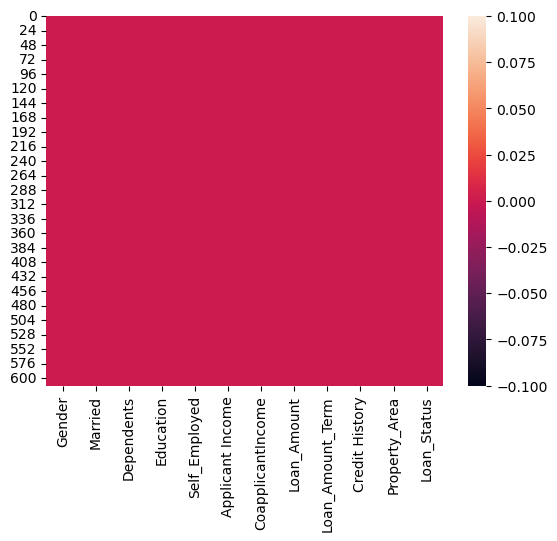

In [21]:
sns.heatmap(df.isnull())

In [22]:
for column in df.columns:
    print(column,df[column].nunique())

Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
Applicant Income 504
CoapplicantIncome 287
Loan_Amount 204
Loan_Amount_Term 10
Credit History 2
Property_Area 3
Loan_Status 2


# Data Analysis and Visualization:-

Number of people who take loan as group by gender:
Male      501
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

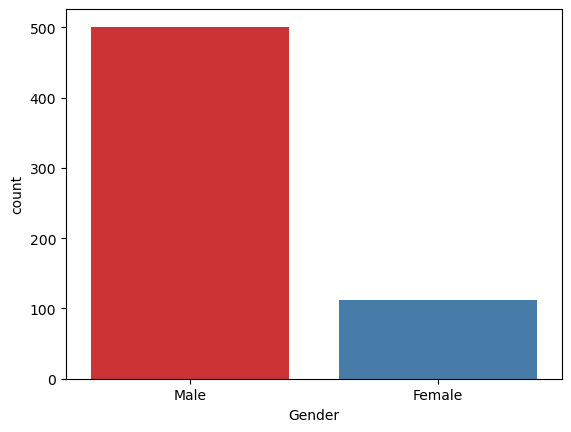

In [23]:
print('Number of people who take loan as group by gender:')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

Number of people who take loan as group by marital status:
Yes    401
No     212
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

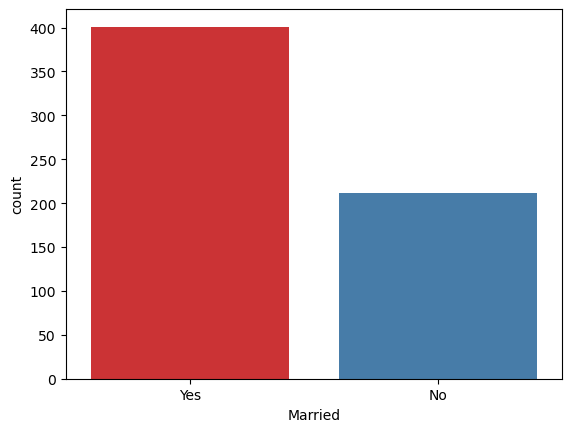

In [24]:
print('Number of people who take loan as group by marital status:')
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

Number of people who take loan as group by dependents:
0     359
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

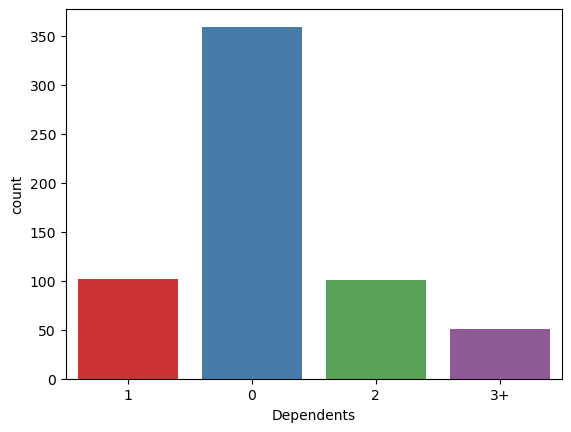

In [25]:
print('Number of people who take loan as group by dependents:')
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

Number of people who take loan as group by Self employed:
No     531
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

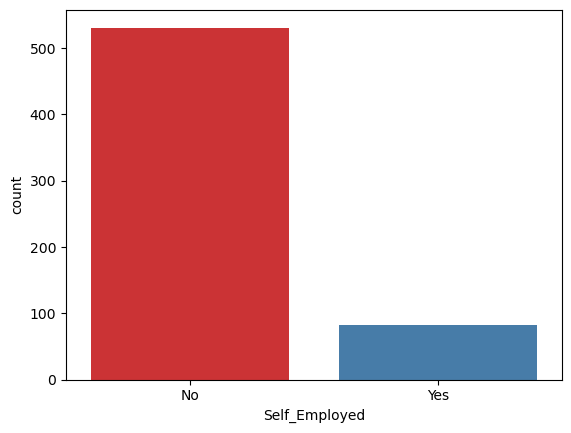

In [26]:
print('Number of people who take loan as group by Self employed:')
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

Number of people who take loan as group by loan amount:
146.412162    21
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: Loan_Amount, Length: 204, dtype: int64


<Axes: xlabel='Loan_Amount', ylabel='count'>

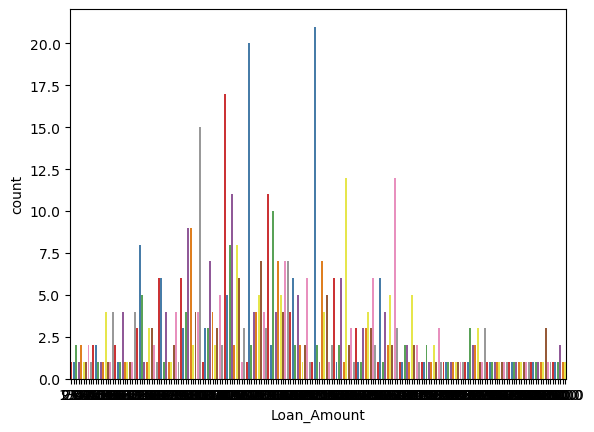

In [27]:
print('Number of people who take loan as group by loan amount:')
print(df['Loan_Amount'].value_counts())
sns.countplot(x='Loan_Amount',data=df,palette='Set1')

Number of people who take loan as group by Credit history:
1.0    524
0.0     89
Name: Credit History, dtype: int64


<Axes: xlabel='Credit History', ylabel='count'>

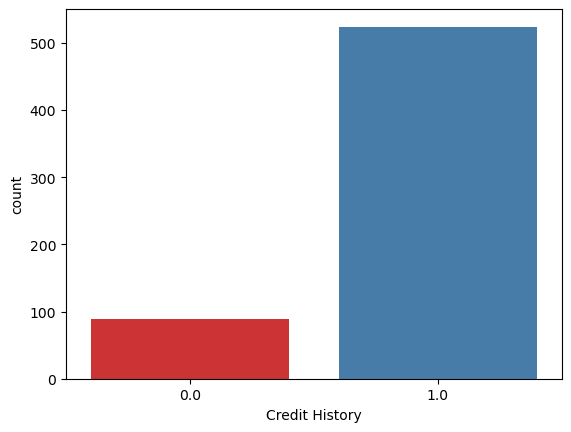

In [28]:
print('Number of people who take loan as group by Credit history:')
print(df['Credit History'].value_counts())
sns.countplot(x='Credit History',data=df,palette='Set1')

<Axes: >

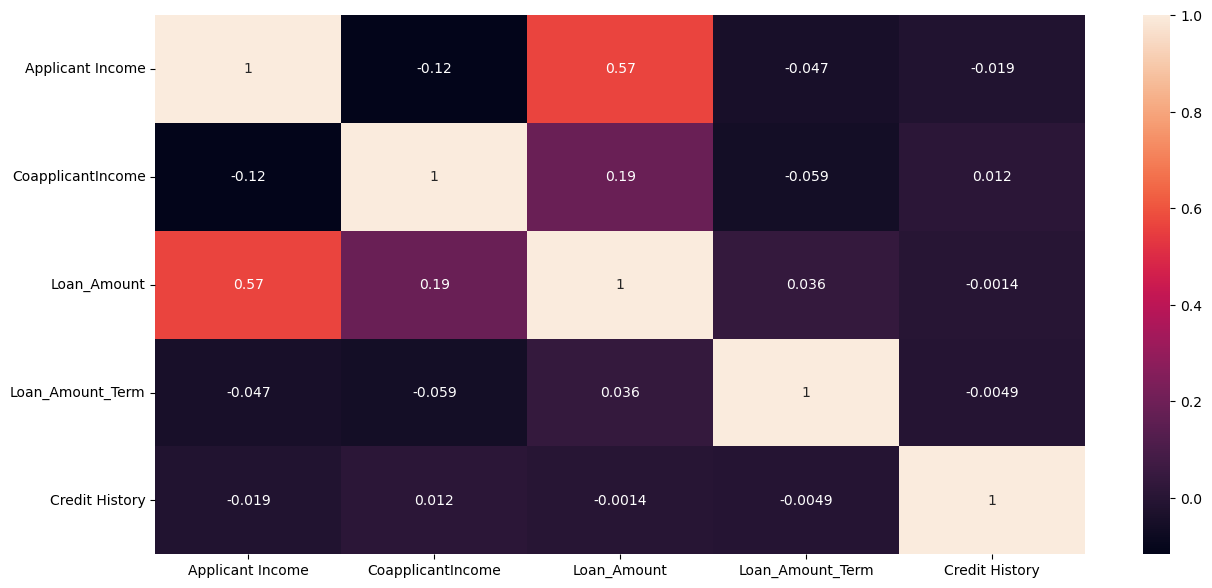

In [29]:
#checking for correlation in the dataset:-

cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

<Axes: xlabel='Education', ylabel='count'>

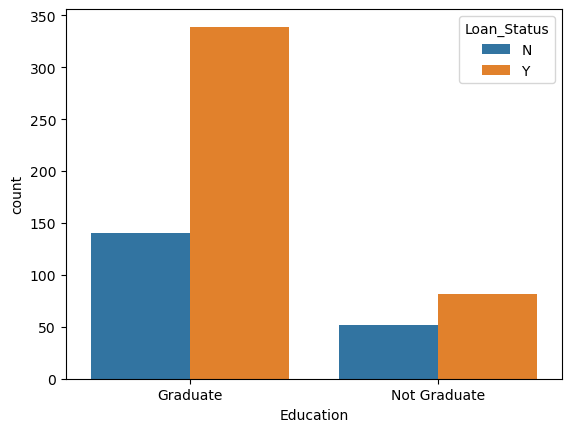

In [31]:
#education and loan status:

sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

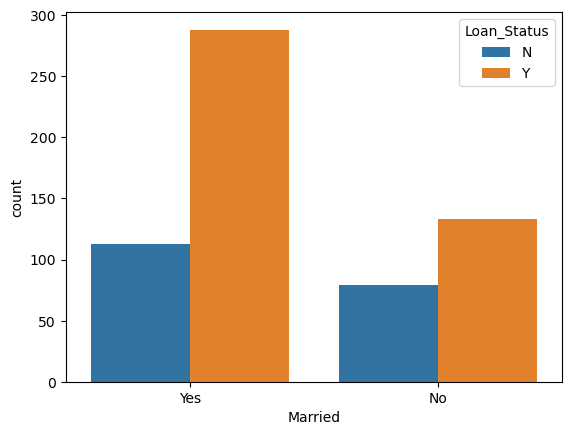

In [32]:
# marital status and loan status:

sns.countplot(x='Married',hue='Loan_Status',data=df)

# Histogram:

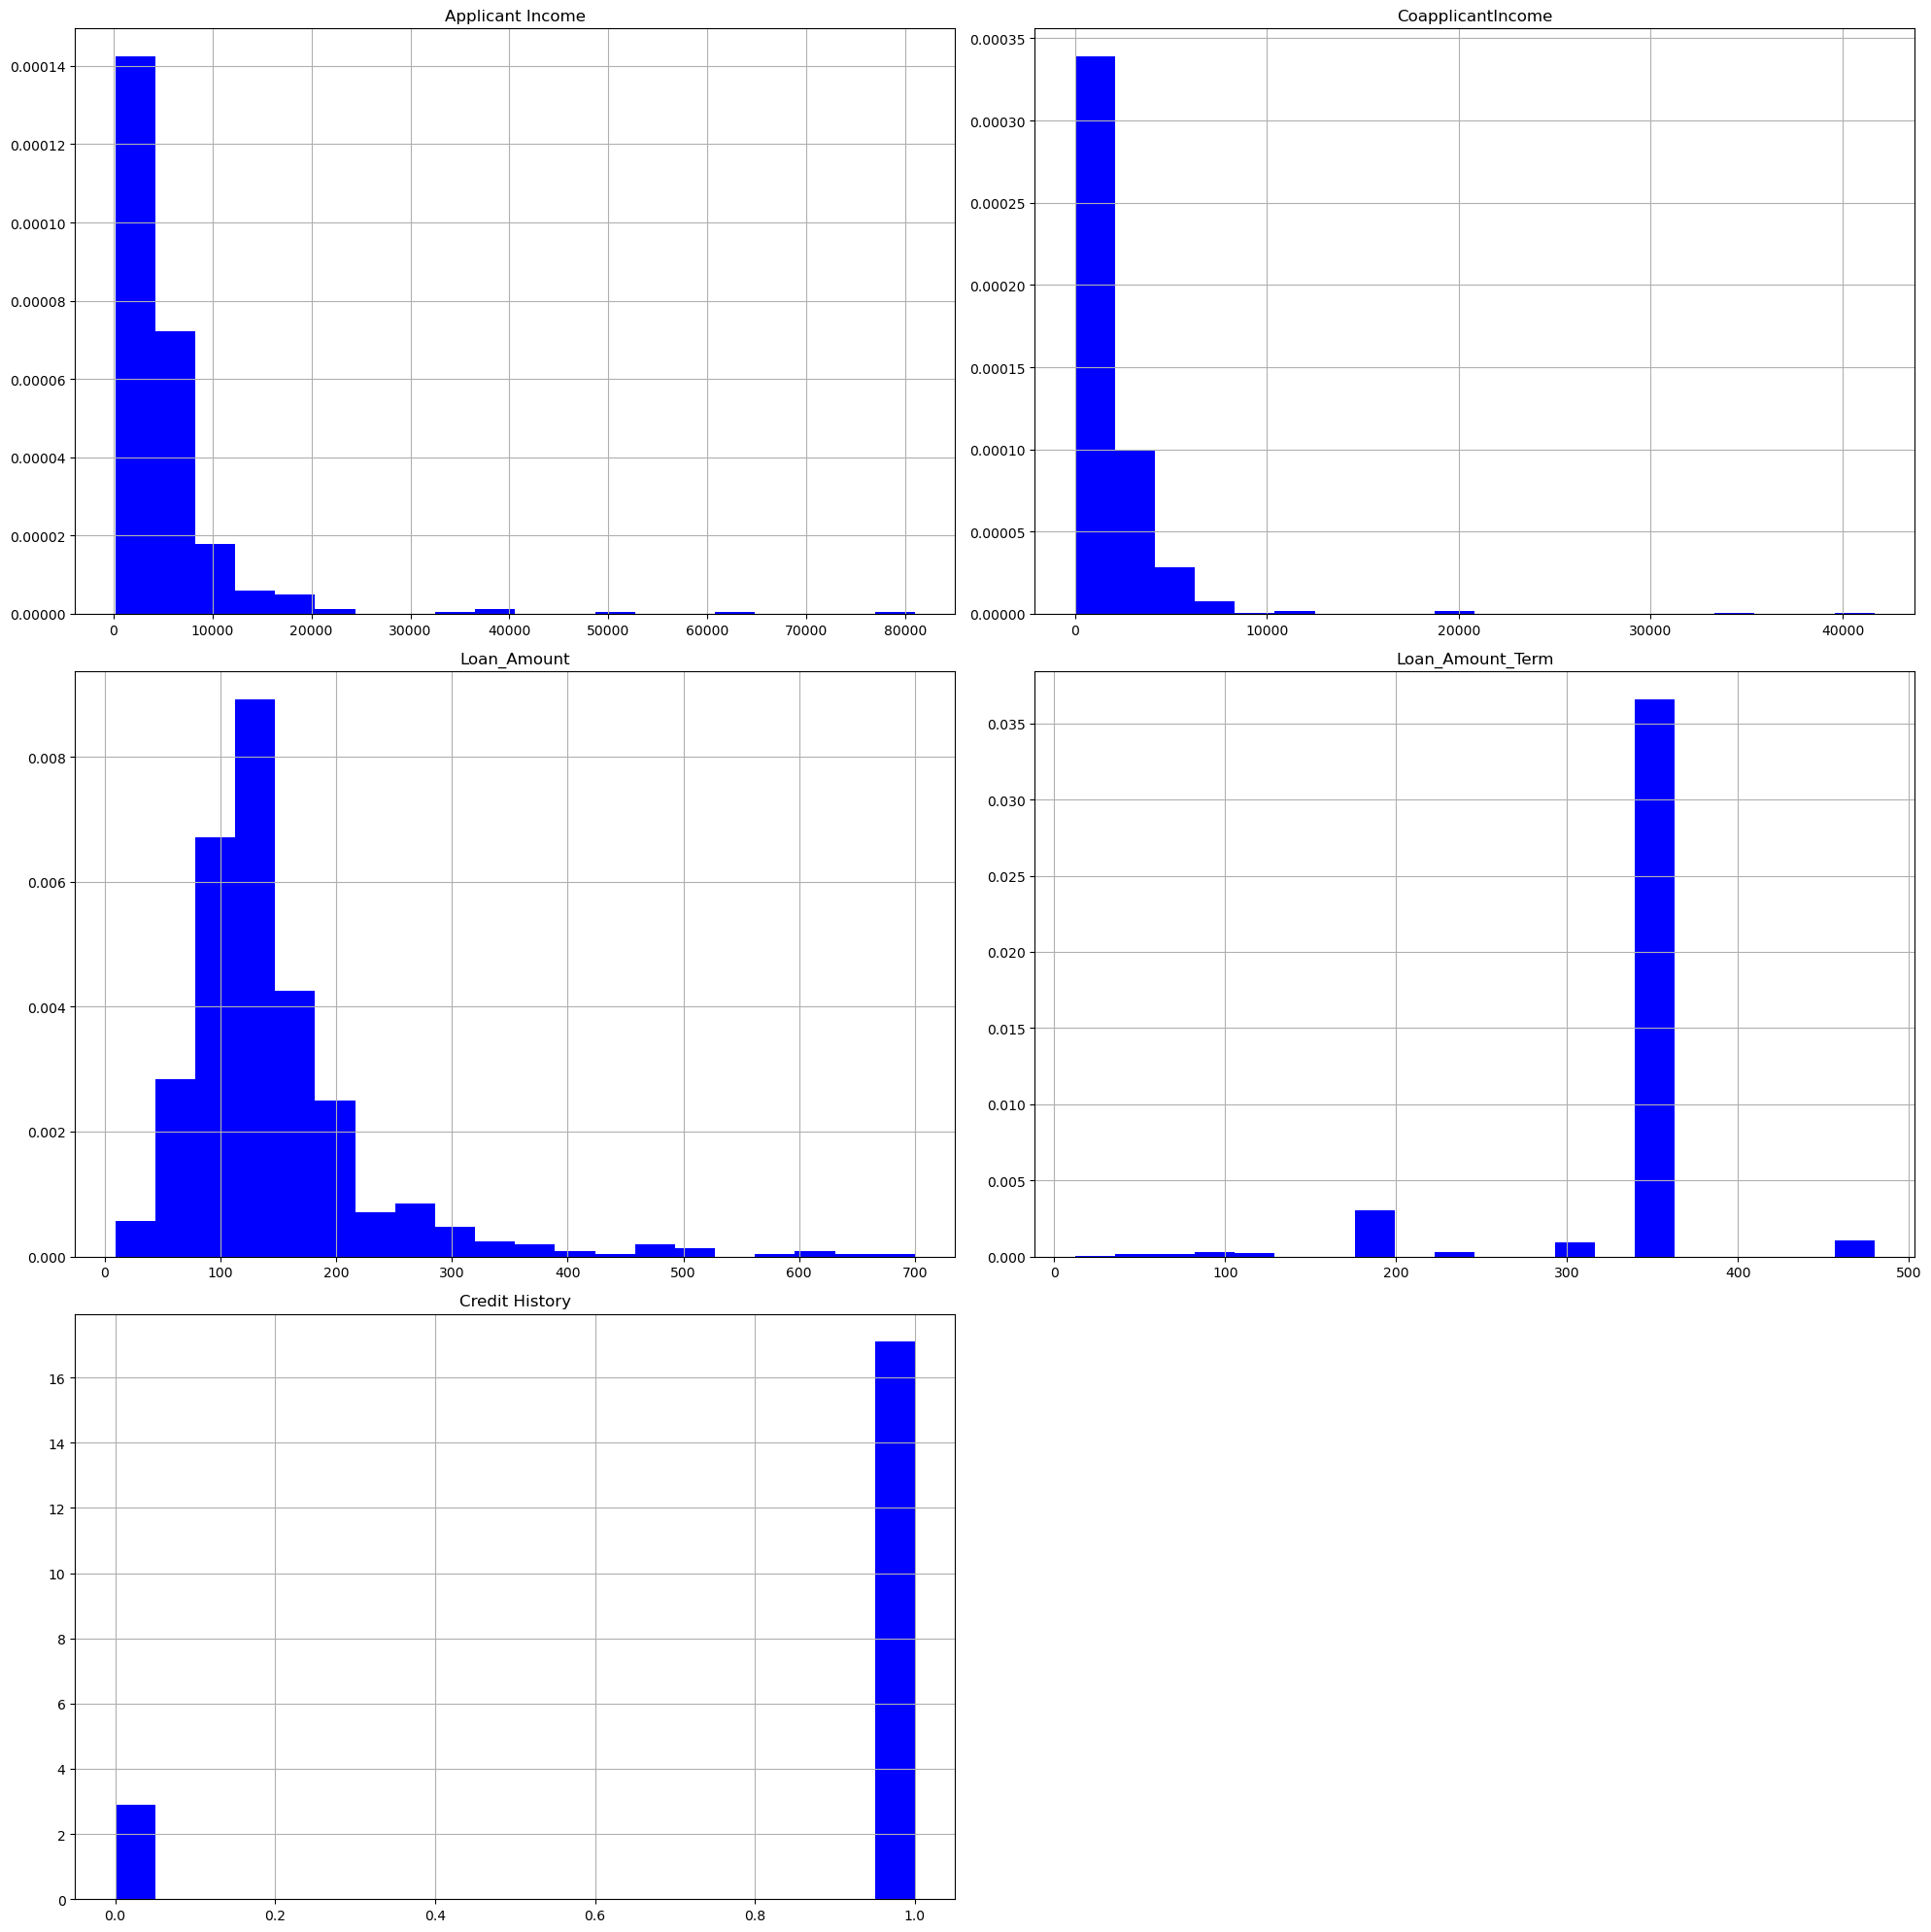

In [33]:
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

# Pairplot:

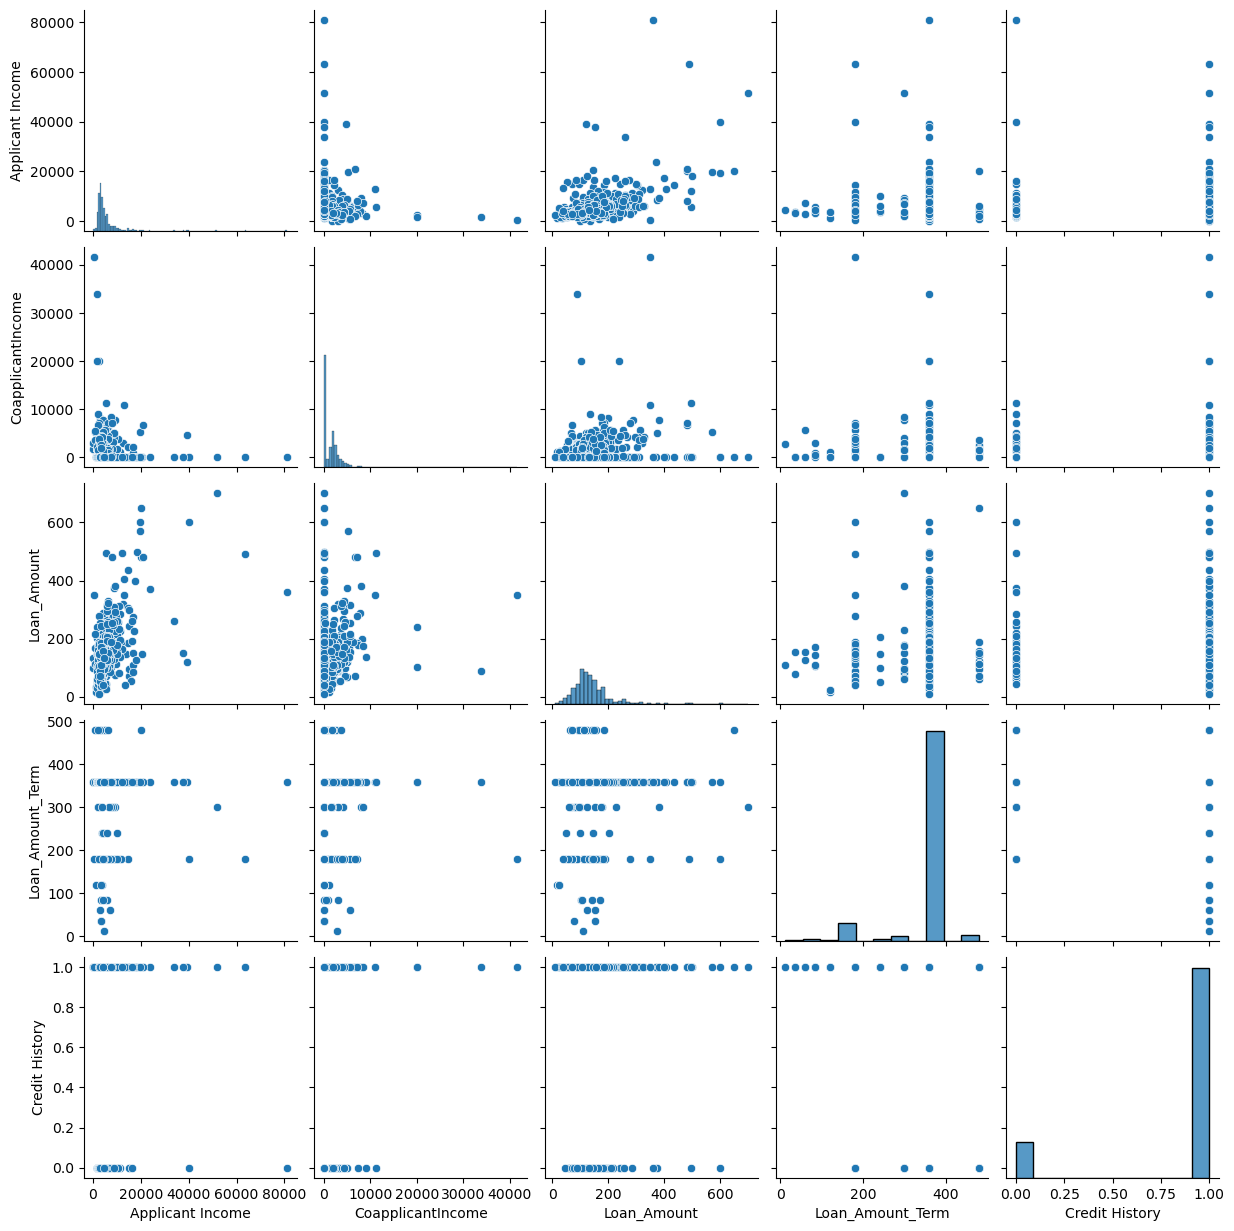

In [34]:
#Using the PairPlot:

sns.pairplot(df)
plt.show()

# Catagorical Data Handling:-

# Apply label encoder:-

In [35]:
#converting data to numerical type using LabelEncoder:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df.Gender.drop_duplicates())
df.Gender= label.transform(df.Gender)

label.fit(df.Married.drop_duplicates())
df.Married= label.transform(df.Married)

label.fit(df.Education.drop_duplicates())
df.Education= label.transform(df.Education)

label.fit(df.Self_Employed.drop_duplicates())
df.Self_Employed= label.transform(df.Self_Employed)

label.fit(df.Loan_Status.drop_duplicates())
df.Loan_Status= label.transform(df.Loan_Status)

df.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
Applicant Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area         object
Loan_Status            int32
dtype: object

# Apply ordinal encoder:-

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
enc=OrdinalEncoder()
df['Dependents']=enc.fit_transform(df[['Dependents']])
df['Property_Area']=enc.fit_transform(df[['Property_Area']])

df.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
Applicant Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area        float64
Loan_Status            int32
dtype: object

# Checking Outliers:

Gender                  Axes(0.125,0.712609;0.133621x0.167391)
Married              Axes(0.285345,0.712609;0.133621x0.167391)
Dependents            Axes(0.44569,0.712609;0.133621x0.167391)
Education            Axes(0.606034,0.712609;0.133621x0.167391)
Self_Employed        Axes(0.766379,0.712609;0.133621x0.167391)
Applicant Income        Axes(0.125,0.511739;0.133621x0.167391)
CoapplicantIncome    Axes(0.285345,0.511739;0.133621x0.167391)
Loan_Amount           Axes(0.44569,0.511739;0.133621x0.167391)
Loan_Amount_Term     Axes(0.606034,0.511739;0.133621x0.167391)
Credit History       Axes(0.766379,0.511739;0.133621x0.167391)
Property_Area            Axes(0.125,0.31087;0.133621x0.167391)
Loan_Status           Axes(0.285345,0.31087;0.133621x0.167391)
dtype: object

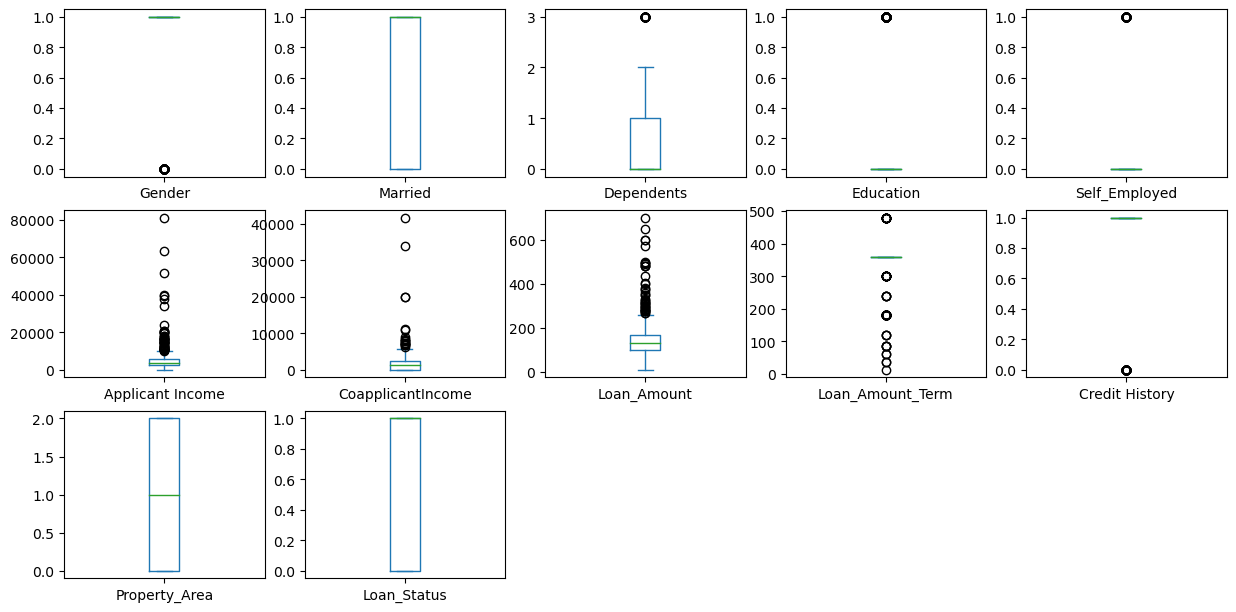

In [38]:
#Plotting the boxplot of each column to check the outliers:

df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

# Removing Outliers using z-score method:-

In [39]:
import scipy.stats as stats
from scipy.stats import zscore

In [40]:
#z score method:

z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0.0,0
1,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2.0,1
2,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2.0,1
3,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2.0,1
4,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0.0,1
609,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0.0,1
610,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2.0,1
611,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2.0,1


In [41]:
#Checking shape of new dataset:
df_new.shape

(576, 12)

In [42]:
#Checking shape of old dataset:
df.shape

(613, 12)

# Checking for skewness:

In [43]:
df_new.skew()

Gender              -1.620181
Married             -0.635432
Dependents           1.049515
Education            1.303909
Self_Employed        2.249864
Applicant Income     2.149534
CoapplicantIncome    1.348577
Loan_Amount          1.113223
Loan_Amount_Term    -2.096104
Credit History      -1.973183
Property_Area       -0.052313
Loan_Status         -0.819913
dtype: float64

# Skewness Handling:

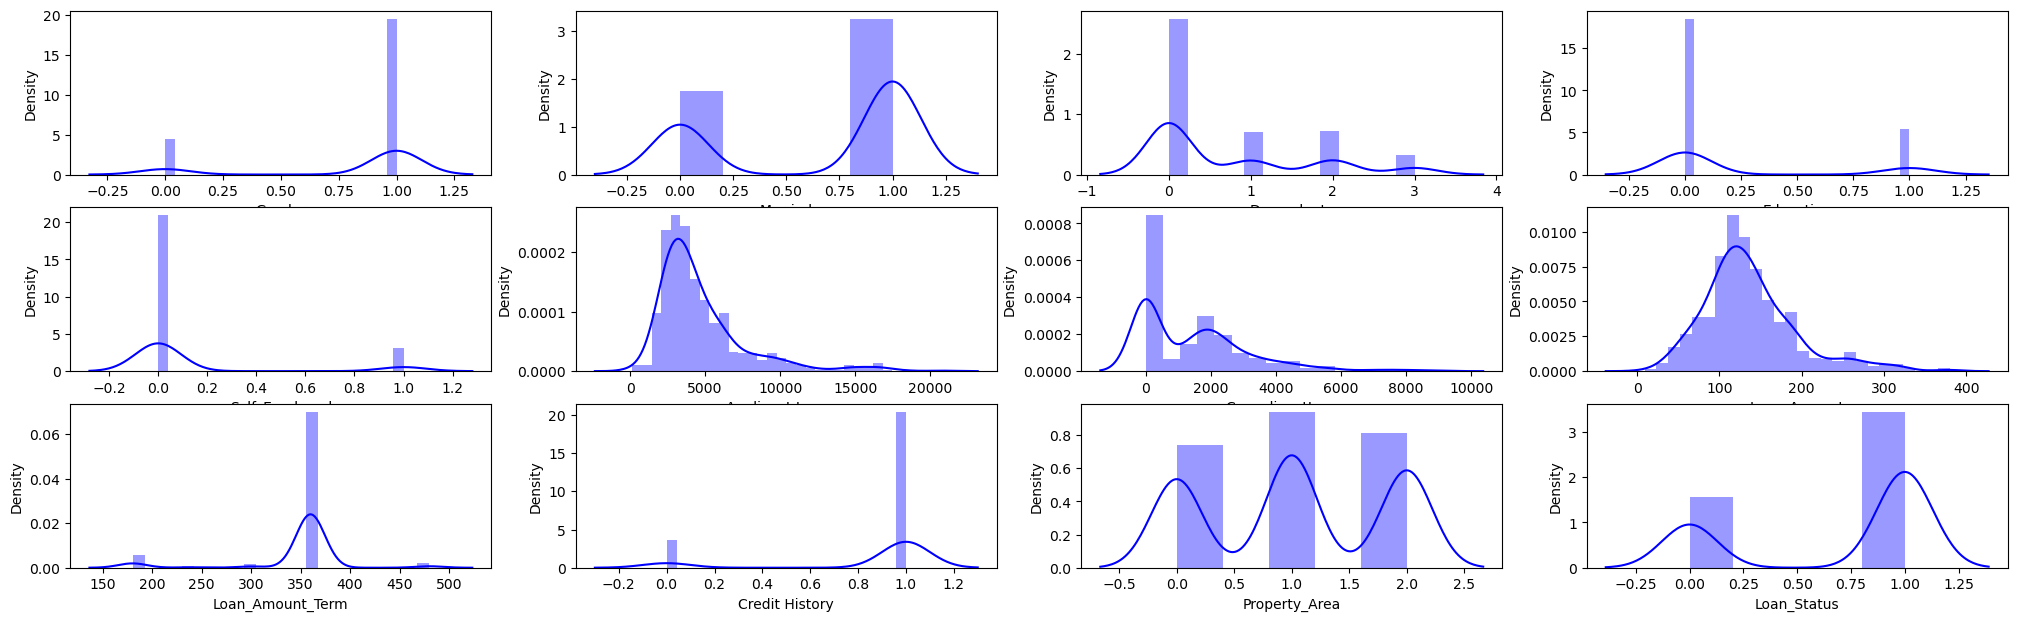

In [44]:
plt.figure(figsize=(25,20))
for i in enumerate(df_new.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df_new[i[1]],color='b')

* Skewness more than +/-0.5 will be treated.

In [45]:
#Removing skewness of the data:

from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df_new.columns:
    if abs(df_new.loc[:,i].skew())>0.5:
        df_new.loc[:,i]=PT.fit_transform(df_new.loc[:,i].values.reshape(-1,1))

In [46]:
df_new.skew()

Gender              -1.620181
Married             -0.635432
Dependents           0.476020
Education            1.303909
Self_Employed        2.249864
Applicant Income     0.027642
CoapplicantIncome   -0.195199
Loan_Amount          0.047431
Loan_Amount_Term     0.725684
Credit History      -1.973183
Property_Area       -0.052313
Loan_Status         -0.819913
dtype: float64

# Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label:

In [47]:
x=df_new.drop('Loan_Status',axis=1) #List of all feature
y=df_new['Loan_Status'] #Label

print(x.shape)
print(y.shape)

(576, 11)
(576,)


In [48]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
0,0.477645,0.732120,0.900033,-0.542570,-0.380958,0.236084,0.741621,-0.015106,0.130968,0.418939,0.0
1,0.477645,0.732120,-0.810327,-0.542570,2.624959,-0.525595,-1.124542,-1.441642,0.130968,0.418939,2.0
2,0.477645,0.732120,-0.810327,1.843081,-0.380958,-0.790327,0.893992,-0.168977,0.130968,0.418939,2.0
3,0.477645,-1.365896,-0.810327,-0.542570,-0.380958,0.729802,-1.124542,0.222044,0.130968,0.418939,2.0
4,0.477645,0.732120,1.343113,-0.542570,2.624959,0.541602,1.098520,2.002482,0.130968,0.418939,2.0


In [49]:
y.head()

0   -1.489254
1    0.671477
2    0.671477
3    0.671477
4    0.671477
Name: Loan_Status, dtype: float64

In [50]:
from sklearn import preprocessing
from sklearn import utils

In [51]:
#convert y values to categorical values:
lab=preprocessing.LabelEncoder()
y = lab.fit_transform(y)

In [52]:
#view transformed values:
print(y)

[0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 0 0 1 1 

# Feature Scaling:-

In [53]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
0,0.477645,0.732120,0.900033,-0.542570,-0.380958,0.236084,0.741621,-0.015106,0.130968,0.418939,-1.304968
1,0.477645,0.732120,-0.810327,-0.542570,2.624959,-0.525595,-1.124542,-1.441642,0.130968,0.418939,1.230147
2,0.477645,0.732120,-0.810327,1.843081,-0.380958,-0.790327,0.893992,-0.168977,0.130968,0.418939,1.230147
3,0.477645,-1.365896,-0.810327,-0.542570,-0.380958,0.729802,-1.124542,0.222044,0.130968,0.418939,1.230147
4,0.477645,0.732120,1.343113,-0.542570,2.624959,0.541602,1.098520,2.002482,0.130968,0.418939,1.230147
...,...,...,...,...,...,...,...,...,...,...,...
571,-2.093604,-1.365896,-0.810327,-0.542570,-0.380958,-0.585757,-1.124542,-1.300039,0.130968,0.418939,-1.304968
572,0.477645,0.732120,1.533034,-0.542570,-0.380958,0.036794,-1.124542,-2.320458,-2.560762,0.418939,-1.304968
573,0.477645,0.732120,0.900033,-0.542570,-0.380958,1.282087,0.169084,1.836736,0.130968,0.418939,1.230147
574,0.477645,0.732120,1.343113,-0.542570,-0.380958,1.164979,-1.124542,0.961351,0.130968,0.418939,1.230147


# Multicollinearity using Variance_inflation_factor:-

In [54]:
import statsmodels

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [56]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.221565,Gender
1,1.431932,Married
2,1.183845,Dependents
3,1.064173,Education
4,1.055806,Self_Employed
5,1.761908,Applicant Income
6,1.575560,CoapplicantIncome
7,1.546437,Loan_Amount
8,1.047585,Loan_Amount_Term
9,1.008737,Credit History


# Balancing the target column using SMOTE:-

In [57]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print('unbalanced data: ',Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print('balanced data: ',Counter(y_sm))

unbalanced data:  Counter({1: 397, 0: 179})
balanced data:  Counter({0: 397, 1: 397})


# Machine Learning model building:

In [58]:
#import libraries:-
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

In [59]:
#Creating the data sets:

X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25,random_state=42,shuffle=True)

In [60]:
X_train.shape

(595, 11)

In [61]:
y_train.shape

(595,)

In [62]:
X_test.shape

(199, 11)

In [63]:
y_test.shape

(199,)

# Logistic Regression:-

In [64]:
LR= LogisticRegression()

#training the model:-
LR.fit(X_train,y_train)
pred=LR.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(LR,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result) 

Accuracy_score: 0.6934673366834171
Confusion matrix:
 [[51 51]
 [10 87]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.50      0.63       102
           1       0.63      0.90      0.74        97

    accuracy                           0.69       199
   macro avg       0.73      0.70      0.68       199
weighted avg       0.74      0.69      0.68       199

Cross Validation Score: 0.8194602698650673

 Accuracy Score - cross validation score is -0.12599293318165017


# Decision Tree Classifier:-

In [65]:
DTC= DecisionTreeClassifier()

#training the model:-
DTC.fit(X_train,y_train)
pred=DTC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(DTC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7336683417085427
Confusion matrix:
 [[71 31]
 [22 75]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73       102
           1       0.71      0.77      0.74        97

    accuracy                           0.73       199
   macro avg       0.74      0.73      0.73       199
weighted avg       0.74      0.73      0.73       199

Cross Validation Score: 0.7221889055472264

 Accuracy Score - cross validation score is 0.011479436161316303


# Random forest classifier:-

In [66]:
RFC= RandomForestClassifier()

#training the model:-
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(RFC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result) 

Accuracy_score: 0.8190954773869347
Confusion matrix:
 [[78 24]
 [12 85]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       102
           1       0.78      0.88      0.83        97

    accuracy                           0.82       199
   macro avg       0.82      0.82      0.82       199
weighted avg       0.82      0.82      0.82       199

Cross Validation Score: 0.8038230884557722

 Accuracy Score - cross validation score is 0.01527238893116245


# SVC using linear kernel:-

In [67]:
Linear= SVC(kernel='linear')

#training the model:-
Linear.fit(X_train,y_train)
pred=Linear.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(Linear,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.6884422110552764
Confusion matrix:
 [[40 62]
 [ 0 97]]
n\Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56       102
           1       0.61      1.00      0.76        97

    accuracy                           0.69       199
   macro avg       0.81      0.70      0.66       199
weighted avg       0.81      0.69      0.66       199

Cross Validation Score: 0.8177211394302848

 Accuracy Score - cross validation score is -0.12927892837500843


# SVC using poly kernel:-

In [68]:
Poly= SVC(kernel='poly')

#training the model:-
Poly.fit(X_train,y_train)
pred=Poly.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(Poly,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7336683417085427
Confusion matrix:
 [[52 50]
 [ 3 94]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.51      0.66       102
           1       0.65      0.97      0.78        97

    accuracy                           0.73       199
   macro avg       0.80      0.74      0.72       199
weighted avg       0.80      0.73      0.72       199

Cross Validation Score: 0.7986206896551724

 Accuracy Score - cross validation score is -0.06495234794662974


# SVC using rbf kernel:-

In [69]:
RBF= SVC(kernel='rbf')

#training the model:-
RBF.fit(X_train,y_train)
pred=RBF.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(RBF,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7738693467336684
Confusion matrix:
 [[66 36]
 [ 9 88]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       102
           1       0.71      0.91      0.80        97

    accuracy                           0.77       199
   macro avg       0.79      0.78      0.77       199
weighted avg       0.80      0.77      0.77       199

Cross Validation Score: 0.8177061469265366

 Accuracy Score - cross validation score is -0.043836800192868286


# KNeighbors Classifier:-

In [70]:
KNN= KNeighborsClassifier()

#training the model:-
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(KNN,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7537688442211056
Confusion matrix:
 [[75 27]
 [22 75]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       102
           1       0.74      0.77      0.75        97

    accuracy                           0.75       199
   macro avg       0.75      0.75      0.75       199
weighted avg       0.75      0.75      0.75       199

Cross Validation Score: 0.7882008995502249

 Accuracy Score - cross validation score is -0.034432055329119304


# Gradient Boosting Classifier:-

In [71]:
GBC= GradientBoostingClassifier()

#training the model:-
GBC.fit(X_train,y_train)
pred=GBC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(GBC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8241206030150754
Confusion matrix:
 [[73 29]
 [ 6 91]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81       102
           1       0.76      0.94      0.84        97

    accuracy                           0.82       199
   macro avg       0.84      0.83      0.82       199
weighted avg       0.84      0.82      0.82       199

Cross Validation Score: 0.7813193403298351

 Accuracy Score - cross validation score is 0.042801262685240316


# GaussianNB:-

In [72]:
from sklearn.naive_bayes import GaussianNB

GNB= GaussianNB()

#training the model:-
GNB.fit(X_train,y_train)
pred=GNB.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(GNB,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.6984924623115578
Confusion matrix:
 [[45 57]
 [ 3 94]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.44      0.60       102
           1       0.62      0.97      0.76        97

    accuracy                           0.70       199
   macro avg       0.78      0.71      0.68       199
weighted avg       0.78      0.70      0.68       199

Cross Validation Score: 0.8107646176911544

 Accuracy Score - cross validation score is -0.11227215537959656


# XGBClassifier:-

In [73]:
from xgboost import XGBClassifier

from sklearn.naive_bayes import GaussianNB

XGB= XGBClassifier()

#training the model:-
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(XGB,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7989949748743719
Confusion matrix:
 [[77 25]
 [15 82]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.77      0.85      0.80        97

    accuracy                           0.80       199
   macro avg       0.80      0.80      0.80       199
weighted avg       0.80      0.80      0.80       199

Cross Validation Score: 0.7761019490254872

 Accuracy Score - cross validation score is 0.02289302584888464


# AdaBoostClassifier:-

In [74]:
ABC= AdaBoostClassifier()

#training the model:-
ABC.fit(X_train,y_train)
pred=ABC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(ABC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.7487437185929648
Confusion matrix:
 [[68 34]
 [16 81]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.67      0.73       102
           1       0.70      0.84      0.76        97

    accuracy                           0.75       199
   macro avg       0.76      0.75      0.75       199
weighted avg       0.76      0.75      0.75       199

Cross Validation Score: 0.7882458770614693

 Accuracy Score - cross validation score is -0.03950215846850447


# ExtraTreesClassifier:-

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

ETC= ExtraTreesClassifier()

#training the model:-
ETC.fit(X_train,y_train)
pred=ETC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(ETC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8391959798994975
Confusion matrix:
 [[83 19]
 [13 84]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       102
           1       0.82      0.87      0.84        97

    accuracy                           0.84       199
   macro avg       0.84      0.84      0.84       199
weighted avg       0.84      0.84      0.84       199

Cross Validation Score: 0.7690854572713643

 Accuracy Score - cross validation score is 0.07011052262813311


# Final Selected Model with higher accuracy:-

In [77]:
from sklearn.ensemble import ExtraTreesClassifier

ETC= ExtraTreesClassifier()

#training the model:-
ETC.fit(X_train,y_train)
pred=ETC.predict(X_test)

#Checking Accuracy Score:
acc_score=(accuracy_score(y_test,pred))
print("Accuracy_score:",acc_score)

#confusion matrix:-
print('Confusion matrix:\n',confusion_matrix(y_test,pred))

#classification report:-
class_report=classification_report(y_test,pred)
print('n\Classification Report:\n',class_report)

#cross validation score:-
cv_score=(cross_val_score(ETC,X,y,cv=5).mean())
print("Cross Validation Score:",cv_score)

#Result of accuracy minus cv scores:-
result=acc_score - cv_score
print("\n Accuracy Score - cross validation score is",result)

Accuracy_score: 0.8341708542713567
Confusion matrix:
 [[83 19]
 [14 83]]
n\Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       102
           1       0.81      0.86      0.83        97

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.84      0.83      0.83       199

Cross Validation Score: 0.7743178410794603

 Accuracy Score - cross validation score is 0.0598530131918964


# Applying Grid Search:-

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold,cross_val_score
from numpy import mean

In [79]:
#Hyper parameter Tuning on the best ML model:

par={'n_estimators':range(100,500,100),'criterion':['gini','entropy'],'max_depth':range(0,10,5),'min_samples_split':range(2,3),'min_samples_leaf':range(1,5),'max_features':['auto']}

grid=GridSearchCV(ExtraTreesClassifier(),param_grid=par,verbose=2,n_jobs=-1)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10, 5), 'max_features': ['auto'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 3),
                         'n_estimators': range(100, 500, 100)},
             verbose=2)

In [80]:
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Best score: 0.7495798319327731
Best estimator: ExtraTreesClassifier(max_depth=5, max_features='auto')
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
ETC_final=ExtraTreesClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1,min_samples_split=2,max_features='auto',n_estimators=300,random_state=42)

ETC_final.fit(X_train,y_train)

predETC=ETC_final.predict(X_test)

print('accuracy:',accuracy_score(y_test,predETC))
print('confusion matrix:\n',confusion_matrix(y_test,predETC))
print('classification report:\n',classification_report(y_test,predETC))

accuracy: 0.7336683417085427
confusion matrix:
 [[50 52]
 [ 1 96]]
classification report:
               precision    recall  f1-score   support

           0       0.98      0.49      0.65       102
           1       0.65      0.99      0.78        97

    accuracy                           0.73       199
   macro avg       0.81      0.74      0.72       199
weighted avg       0.82      0.73      0.72       199



#After tweaking parameters we are getting the best accuracy score is 0.7336 which is less than the accuracy score of ExtraTreesClassifier(0.8391) without hyper parameter tunning,so lets save the model in by default Extratrees model.

# AUC ROC Curve:-

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [83]:
#predicting the probability of having 1 in the x_test:
y_pred_prob=ETC.predict_proba(X_test)[:,1]

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

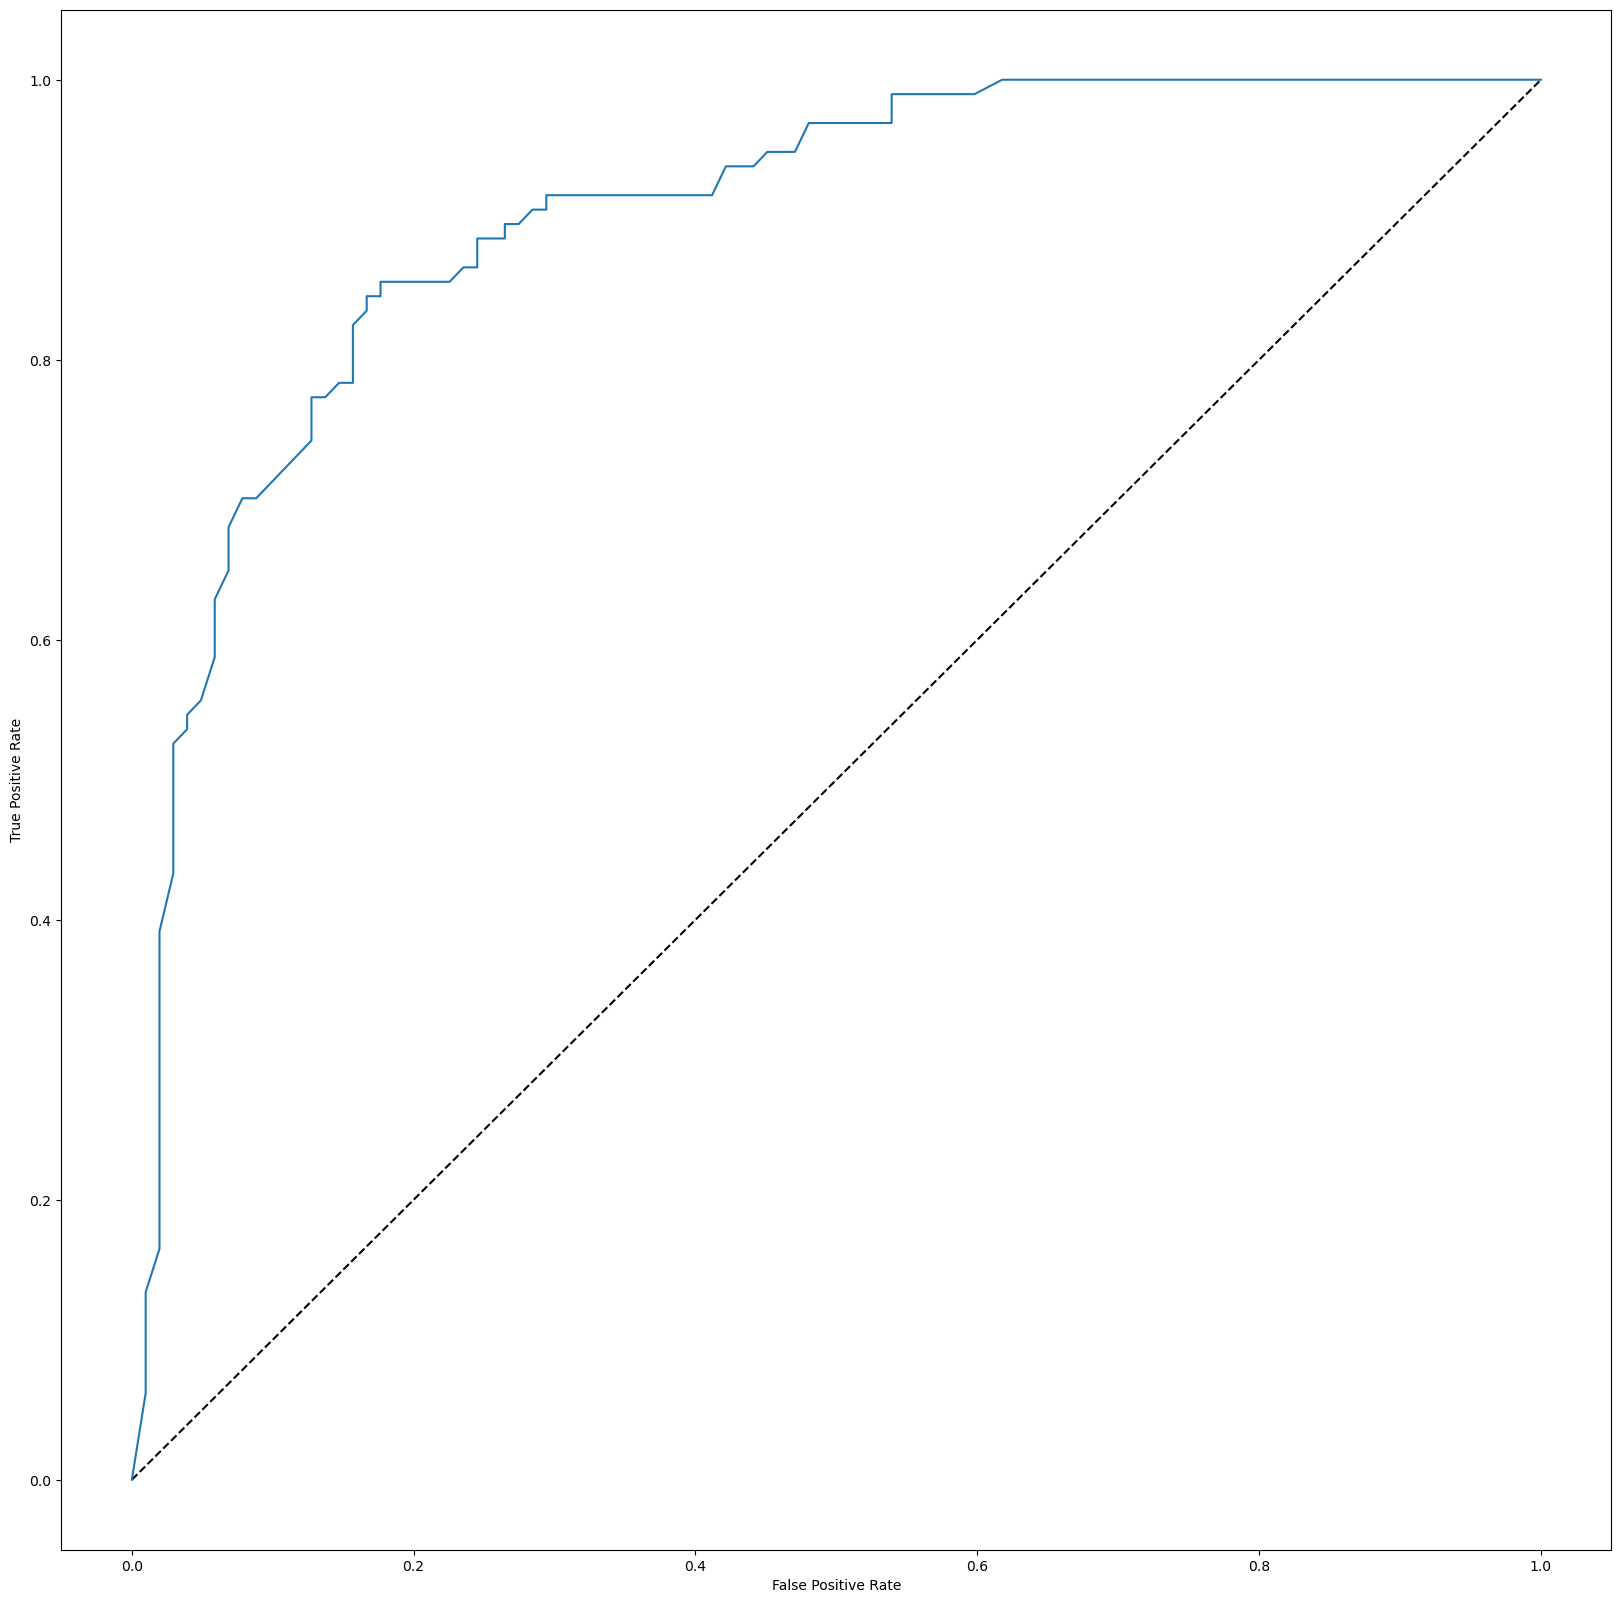

Score: 0.8346977966444309


In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,ETC.predict(X_test))
print('Score:',auc_score)

# Confusion matrix for Random Forest classifier:-

In [86]:
ETC.fit(X_train,y_train)
y_pred=ETC.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [88]:
confusion_matrix(y_test,y_pred)

array([[84, 18],
       [16, 81]], dtype=int64)

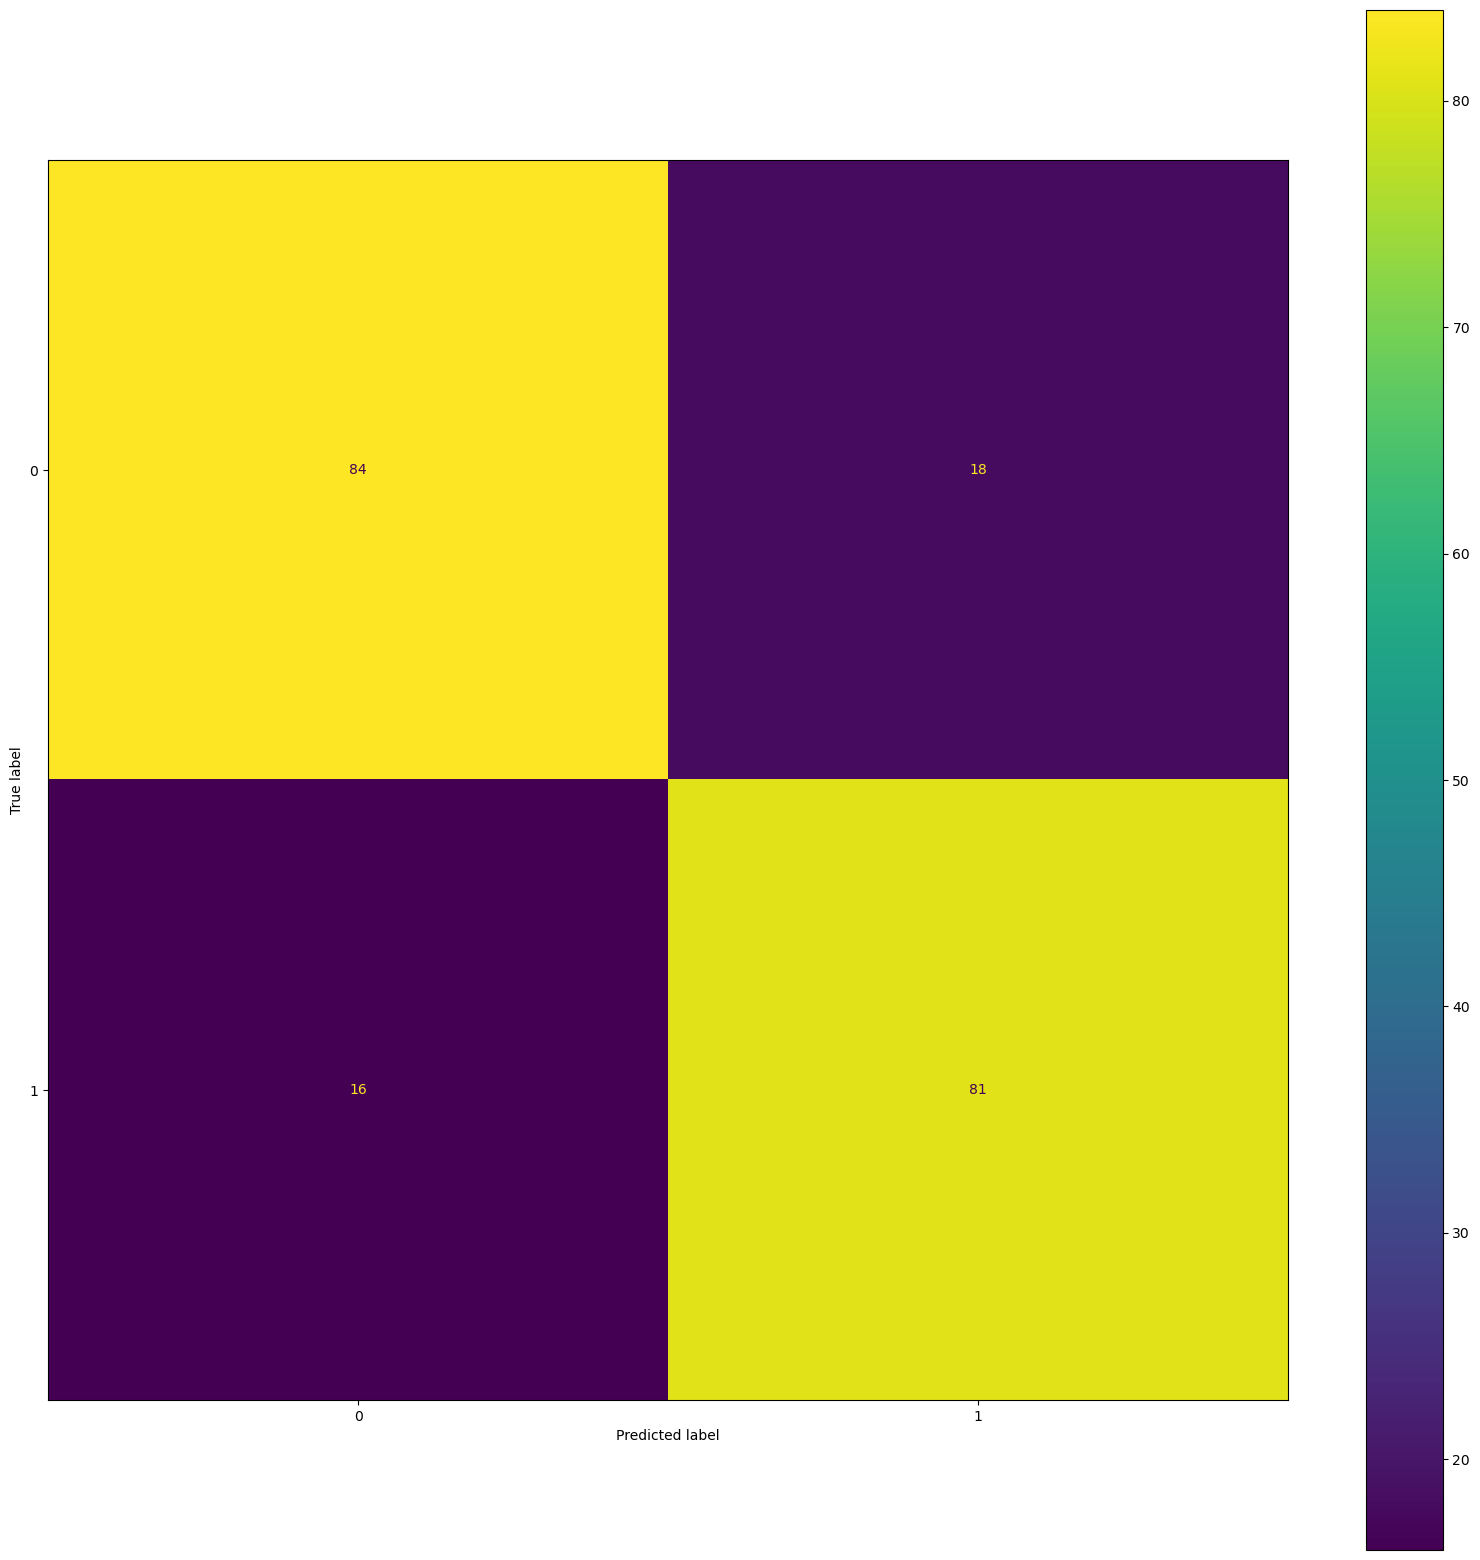

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       102
           1       0.82      0.84      0.83        97

    accuracy                           0.83       199
   macro avg       0.83      0.83      0.83       199
weighted avg       0.83      0.83      0.83       199



In [89]:
predictions=ETC.predict(X_test)
cm=confusion_matrix(y_test,predictions,labels=ETC.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ETC.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred))

#With the help of above matrix we are able to understand the number of times we got the correct outputs and the number of times our ML model missed to provide the correct prediction.

# Prediction Results:-

In [90]:
results=pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','SVC using Linear','SVC using Poly','SVC using rbf','KNeighbors','Gradient Boosting','GaussianNB','XGB','AdaBoost','ExtraTrees'],
    'Score': [0.6934,0.7336,0.8190,0.6884,0.7336,0.7738,0.7537,0.8241,0.6984,0.7989,0.7487,0.8391]})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Model
Score,
0.8391,ExtraTrees
0.8241,Gradient Boosting
0.8190,Random Forest
0.7989,XGB
0.7738,SVC using rbf
0.7537,KNeighbors
0.7487,AdaBoost
0.7336,Decision Tree
0.7336,SVC using Poly


# Conclusion:-

* The result clearly demonstrate that the ExtraTreesClassifier algorithm outperforms the other methods,achieving the highest accuracy among all evaluated classifiers.

* RandomForest and gradient boosting also performed admirably, showing competitive performance with an accuracy close to ExtraTreesClassifier.

* however, SVC using linear exhibited relatively lower accuracies, indicating that they might not be the best choices for this specific dataset.

# Saving My Best Model:-

In [91]:
#From sklearn.externals import joblib
import joblib

In [92]:
#Save the model as a object file:
joblib.dump(ETC,'ETCfile.obj')

['ETCfile.obj']

In [93]:
#Load the model from the file:
ETC_from_joblib=joblib.load('ETCfile.obj')

In [94]:
#Use the loaded model to make predictions:
ETC_from_joblib.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1], dtype=int64)